# Market Basket Analysis

## Basics

Market basket analysis:
1. Identify products frequently purchased together
2. Construct recommendations based on these findings

Use cases of MBA:
* Build recommendation engines
* Improve product recommendations
* Cross-sell products in retail setting
* Improve inventory management
* Upsell products

Association Rules
* Rules that identify items that are associated with each other
* Take the form of an "if-then" relationship between two sets of items
  * {antecedent} -> {consequent}
* Multi-antecednet rule"
  * {antecedent, antecedent} -> {consequent}
* Multi-consequent rule"
  * {antecedent} -> {consequent, consequent}


In [ ]:
!wget https://assets.datacamp.com/production/repositories/5654/datasets/1e5276e5a24493ec07b44fe99b46984f2ffa4488/bookstore_transactions.csv

--2021-01-27 15:20:34--  https://assets.datacamp.com/production/repositories/5654/datasets/1e5276e5a24493ec07b44fe99b46984f2ffa4488/bookstore_transactions.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 104.18.17.147, 104.18.16.147
Connecting to assets.datacamp.com (assets.datacamp.com)|104.18.17.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2062 (2.0K) [application/octet-stream]
Saving to: ‘bookstore_transactions.csv’

bookstore_transacti 100%[===================>]   2.01K  --.-KB/s    in 0s      

2021-01-27 15:20:35 (34.0 MB/s) - ‘bookstore_transactions.csv’ saved [2062/2062]



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
books = pd.read_csv('bookstore_transactions.csv')
books.head()

,Transaction
0,"History,Bookmark"
1,"History,Bookmark"
2,"Fiction,Bookmark"
3,"Biography,Bookmark"
4,"History,Bookmark"


In [ ]:
books.value_counts()

Transaction       
Biography,Bookmark    40
History,Bookmark      25
Fiction,Bookmark      25
Poetry,Bookmark        9
dtype: int64

**Identifying Association Rules**

How to take an enormouse set of potential rules, and identify useful pairings 


In [ ]:
!wget https://assets.datacamp.com/production/repositories/5654/datasets/292498b8454c35e12e9be7ef18bc53c89b3bd073/movielens_movies.csv

--2021-01-28 00:05:32--  https://assets.datacamp.com/production/repositories/5654/datasets/292498b8454c35e12e9be7ef18bc53c89b3bd073/movielens_movies.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 104.18.17.147, 104.18.16.147
Connecting to assets.datacamp.com (assets.datacamp.com)|104.18.17.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1493648 (1.4M) [application/octet-stream]
Saving to: ‘movielens_movies.csv’

movielens_movies.cs 100%[===================>]   1.42M  --.-KB/s    in 0.07s   

2021-01-28 00:05:32 (21.2 MB/s) - ‘movielens_movies.csv’ saved [1493648/1493648]



In [ ]:
movies = pd.read_csv('movielens_movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.shape

(27278, 3)

In [ ]:
genres = list(movies['genres'].apply(lambda t: t.split('|')))
genres[:6]

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller']]

In [ ]:
all_gen_list = ','.join(([','.join(gen) for gen in genres])).split(',')
all_gen_list[:10], len(all_gen_list)

(['Adventure',
  'Animation',
  'Children',
  'Comedy',
  'Fantasy',
  'Adventure',
  'Children',
  'Fantasy',
  'Comedy',
  'Romance'],
 54406)

In [ ]:
unique_gen_list = list(set(all_gen_list))
unique_gen_list

['Animation',
 'Crime',
 'Thriller',
 'War',
 'Action',
 'Western',
 'Film-Noir',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Children',
 'Romance',
 'Horror',
 'Mystery',
 'Comedy',
 'Fantasy',
 'IMAX',
 '(no genres listed)',
 'Musical',
 'Documentary']

Difficulty of selecting rules:
* Set of all possible rules in above is huge
* Most rules are not useful
  * must discard most rules

> Start with simple 1 antecedent 1 consequent rule:

In [ ]:
from itertools import permutations
#Extract unique items
flattened = [item for genres in genres for item in genres]
items = list(set(flattened))

In [ ]:
items

['Animation',
 'Crime',
 'Thriller',
 'War',
 'Action',
 'Western',
 'Film-Noir',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Children',
 'Romance',
 'Horror',
 'Mystery',
 'Comedy',
 'Fantasy',
 'IMAX',
 '(no genres listed)',
 'Musical',
 'Documentary']

In [ ]:
#Compute and print rules
rules = list(permutations(items, 2))
rules[:10]

[('Animation', 'Crime'),
 ('Animation', 'Thriller'),
 ('Animation', 'War'),
 ('Animation', 'Action'),
 ('Animation', 'Western'),
 ('Animation', 'Film-Noir'),
 ('Animation', 'Sci-Fi'),
 ('Animation', 'Adventure'),
 ('Animation', 'Drama'),
 ('Animation', 'Children')]

In [ ]:
len(rules)
#total number of rules

380

**Identifying Useful Rules**

Using:
* Metric - support
  * Metric is a measure of performance for rules
* Process- pruning
  * Uses metric to discard innefective rules

Support is the simplest metric - measures the share of tranactions that contain an itemset:

support = 
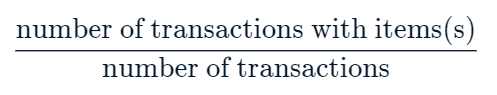

In [ ]:
genres[:10]

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller']]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# Instantiate transaction encoder
encoder = TransactionEncoder().fit(genres)

In [ ]:
# One-hot encode items by applying transform
onehot = encoder.transform(genres)
onehot

array([[False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False]])

In [ ]:
onehot.shape
# Each column corresponds to one of the 20 unique genres in dataset

(27278, 20)

In [ ]:
# Convert to DataFrame
oh_df = pd.DataFrame(onehot, columns = encoder.columns_)
oh_df

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27274,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27275,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27276,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
oh_df['Western'].sum() / 27278

0.024781875504069212

In [ ]:
# Calculate support metric by computing the mean over each column
oh_df.mean()

(no genres listed)    0.009018
Action                0.129042
Adventure             0.085380
Animation             0.037649
Children              0.041755
Comedy                0.306987
Crime                 0.107743
Documentary           0.090586
Drama                 0.489185
Fantasy               0.051763
Film-Noir             0.012098
Horror                0.095718
IMAX                  0.007185
Musical               0.037979
Mystery               0.055503
Romance               0.151294
Sci-Fi                0.063898
Thriller              0.153164
War                   0.043772
Western               0.024782
dtype: float64

Computing support for multiple items:

In [ ]:
oh_df['Drama+Romance'] =  np.logical_and(oh_df['Drama'], oh_df['Romance'])
oh_df['Musical+Horror'] =  np.logical_and(oh_df['Musical'], oh_df['Horror'])
oh_df

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Drama+Romance,Musical+Horror
0,False,False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27274,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27275,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27276,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
supports = oh_df.mean()
supports

(no genres listed)    0.009018
Action                0.129042
Adventure             0.085380
Animation             0.037649
Children              0.041755
Comedy                0.306987
Crime                 0.107743
Documentary           0.090586
Drama                 0.489185
Fantasy               0.051763
Film-Noir             0.012098
Horror                0.095718
IMAX                  0.007185
Musical               0.037979
Mystery               0.055503
Romance               0.151294
Sci-Fi                0.063898
Thriller              0.153164
War                   0.043772
Western               0.024782
Drama+Romance         0.094325
Musical+Horror        0.000843
dtype: float64

In [ ]:
np.logical_and(oh_df['Romance'], oh_df['Drama'], ).mean()
#same result if order of columns reversed 

0.09432509714788474

## Association Rules

**Confidence and Lift**

> Confidence: 

Support(X&Y) / Support(X)

Confidence tells the probability that we'll purchase Y, given that we purchased X.

In [ ]:
supports

(no genres listed)    0.009018
Action                0.129042
Adventure             0.085380
Animation             0.037649
Children              0.041755
Comedy                0.306987
Crime                 0.107743
Documentary           0.090586
Drama                 0.489185
Fantasy               0.051763
Film-Noir             0.012098
Horror                0.095718
IMAX                  0.007185
Musical               0.037979
Mystery               0.055503
Romance               0.151294
Sci-Fi                0.063898
Thriller              0.153164
War                   0.043772
Western               0.024782
Drama+Romance         0.094325
Musical+Horror        0.000843
dtype: float64

In [ ]:
supports['Romance']

0.1512940831439255

In [ ]:
supports['Drama+Romance'] / supports['Drama']
# 19 % chance purchasing Romance given a purchase of Drama 

0.19282074340527577

In [ ]:
supports['Drama']

0.48918542415133076

In [ ]:
supports['Drama+Romance'] / supports['Romance']
# 62 % chance purchasing Drama given a purchase of Romance

0.6234552944027139

> Lift: 

Support(X&Y) / Support(X) * Support(Y)

* Numerator: Proportion of transactions that contain both X and Y
* Denominator: Proportion if X and Y are assigned randomly and independently 

A lift value greater than 1 indicates that two items occur in transactions together more often than what we would expect based on their individual support values. Convenient threshhold for filtering purposes.

In [ ]:
supports['Drama+Romance'] / (supports['Drama'] * supports['Romance'])

1.274476432907466

In [ ]:
# Musical and Horror are very unrelated
supports['Musical+Horror'] / (supports['Musical'] * supports['Horror'])
# Lift value far below 1

0.23193897514081352

In [ ]:
supports['Horror']

0.09571816115550993

In [ ]:
supports['Musical+Horror'] / supports['Musical']
# only 2% chance of purchasing Horror given a purchase of musical, much lower than 9% support of Horror on its own

0.0222007722007722

**Leverage and Conviction**

More complicated metrics in MBA tend to build on simpler ones

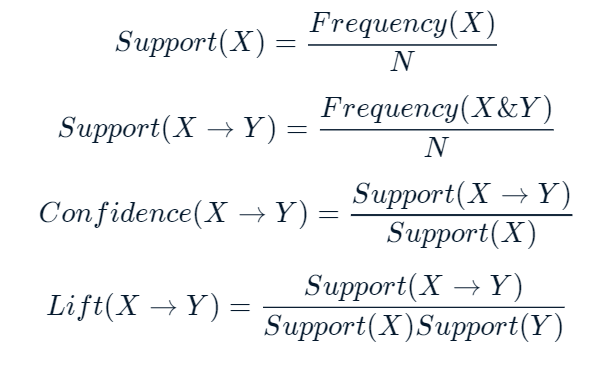

> Leverage

Leverage also builds on support: 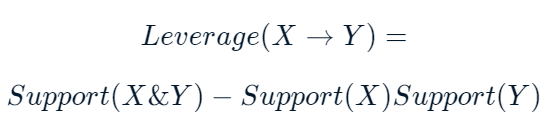

* Leverage is similar to lift, but **easier to interpret**
* Leverage **lies in -1 and +1 range**
  * Lift ranges from 0 -> infinity

In [ ]:
supports['Drama+Romance'] - (supports['Drama'] * supports['Romance'])
# positive lift

0.020314236913536843

In [ ]:
supports['Musical+Horror'] - (supports['Musical'] * supports['Horror'])
# negative lift

-0.0027921407345519573

> Conviction

Conviction also build using support, but more complicated and less intuitive than leverage

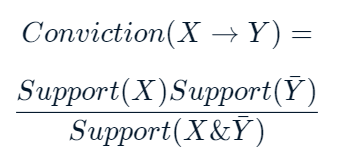

* Support of NOT Y is simply the share of all transactions that do not include Y
* Support of X and NOT Y is the share of all transactions that contain X and not Y

In [ ]:
# Support of NOT Drama
supports['Not_Drama'] = 1 - supports['Drama']
supports[-1:]

Not_Drama    0.510815
dtype: float64

In [ ]:
# Support of Romance and NOT Drama
supports['Romance+Not_Drama'] = supports['Romance'] - supports['Drama+Romance']
supports[-1:]

Romance+Not_Drama    0.056969
dtype: float64

In [ ]:
# Compute Conviction
(supports['Romance'] * supports['Not_Drama']) / supports['Romance+Not_Drama']

# Value above one is further evidence of the rule if Romance then Drama

1.35658414062256

**Association and dissociation**

Zhang's metric - measure both association and dissocoiation

* Value of +1 indicates perfect association
* Value of -1 indicates perfect dissocociation

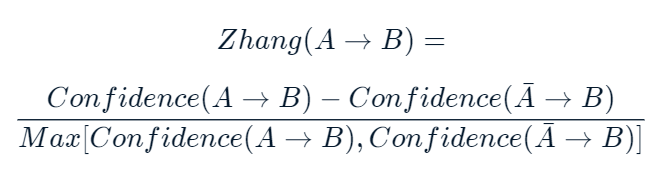

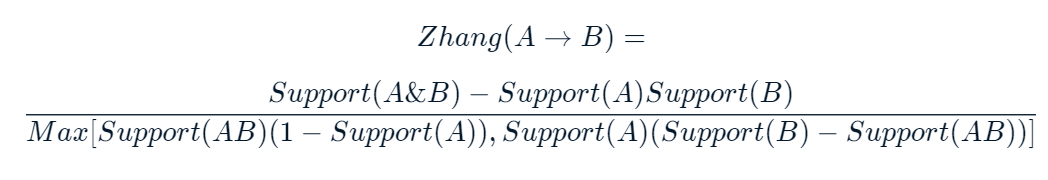

In [ ]:
supports

(no genres listed)    0.009018
Action                0.129042
Adventure             0.085380
Animation             0.037649
Children              0.041755
Comedy                0.306987
Crime                 0.107743
Documentary           0.090586
Drama                 0.489185
Fantasy               0.051763
Film-Noir             0.012098
Horror                0.095718
IMAX                  0.007185
Musical               0.037979
Mystery               0.055503
Romance               0.151294
Sci-Fi                0.063898
Thriller              0.153164
War                   0.043772
Western               0.024782
Drama+Romance         0.094325
Musical+Horror        0.000843
Not_Drama             0.510815
Romance+Not_Drama     0.056969
dtype: float64

In [ ]:
 num = supports['Drama+Romance'] - (supports['Drama'] * supports['Romance'])
 denom = max(supports['Drama+Romance'] * (1 - supports['Drama']), supports['Drama']* (supports['Romance'] - supports['Drama+Romance']))

 num/denom
 # positive association

0.42160909481046366

In [ ]:
 num = supports['Musical+Horror'] - (supports['Musical'] * supports['Horror'])
 denom = max(supports['Musical+Horror'] * (1 - supports['Musical']), supports['Musical']* (supports['Horror'] - supports['Musical+Horror']))

 num/denom
 # dissasociation

-0.7748869149564667

In [ ]:
# Define a function to compute Zhang's metric
def zhang(antecedent, consequent):
	# Compute the support of each book
	supportA = antecedent.mean()
	supportC = consequent.mean()

	# Compute the support of both books
	supportAC = np.logical_and(antecedent, consequent).mean()

	# Complete the expressions for the numerator and denominator
	numerator = supportAC - supportA*supportC
	denominator = max(supportAC*(1-supportA), supportA*(supportC-supportAC))

	# Return Zhang's metric
	return numerator / denominator

In [ ]:
oh_df.sample(1)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Drama+Romance,Musical+Horror
12784,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
zhang(oh_df['Drama'], oh_df['Romance'])

0.42160909481046366

In [ ]:
zhang(oh_df['Musical'], oh_df['Horror'])

-0.7748869149564667

**Advanced rules**

Standard procedure for market basket analysis.
1. Generate a large set of rules.
2. Filter rules using metrics.
3. Apply intuition and common sense.

Generating rules
* Number of rules grows exponentially with number of items 
  * Most rules are not useful
* Must apply initial round of filtering

Filtering removes rules that perform poorly according to some metrics


# Cluster Analysis 

## Intro

**Unsupervised Learning Basics**

Unsupervised Learning
* Group of ML algorithms that find patterns in data
* Data for algorithms has not been labeled, classified, or characterized
* The objective of the algorithm is to interpret any structure in the data
* Common algorithms: *clustering*, neural networks, anomaly detection

Clustering - Unsupervised learning algorithm to group data based on characteristics
* Items in groups more similar to each other than in other groups



> Simple example, plots on a 2d plain:

Plotting can help give intuitive understanding how many clusters are present in the data

In [ ]:
from matplotlib import pyplot as plt
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

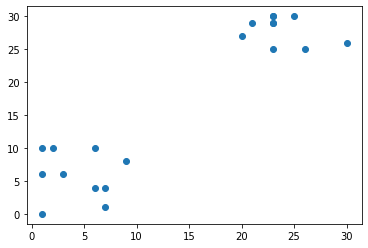

In [ ]:
plt.scatter(x, y)
plt.show()
#obvious clusters

**Basics of Cluster Analysis**

Cluster
* A group of items with similar characteristics
* Ex - customer segments - 
  * based on spending habits
* Clustering algorithms:
  * hierarchecal, K-means
  * DBSCAN, Gaussian methods


Hierarchecal clustering steps:
1. All points are considered as individual clusters
  * cluster center is the mean of all attributes of all data points in a cluster
2. Distances between all pairs of cluster centers are computed, and the two closest clusters are merged
  * process of merging two closest continues until arriving at the desired clusters
  * at each step the number of clusters reduces by one


**Hierarchical clustering in SciPy**

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import seaborn as sns, pandas as pd

In [ ]:
df = pd.DataFrame({'xc': x, 'yc':y})
df.sample(5)

,xc,yc
2,2,10
12,25,30
9,7,1
16,23,25
13,23,29


* Linkage method computes distances between intermediate clusters
* Fcluster method generates clusters and assigns associated labels with column name

In [ ]:
z = linkage(df, "ward")
z

array([[10.        , 13.        ,  0.        ,  2.        ],
       [15.        , 19.        ,  0.        ,  2.        ],
       [ 1.        ,  5.        ,  1.        ,  2.        ],
       [ 2.        ,  6.        ,  1.        ,  2.        ],
       [20.        , 21.        ,  1.41421356,  4.        ],
       [ 3.        ,  8.        ,  2.        ,  2.        ],
       [14.        , 17.        ,  2.23606798,  2.        ],
       [12.        , 24.        ,  2.60768096,  5.        ],
       [11.        , 16.        ,  3.        ,  2.        ],
       [ 9.        , 22.        ,  3.51188458,  3.        ],
       [ 0.        ,  7.        ,  3.60555128,  2.        ],
       [26.        , 27.        ,  5.59846918,  7.        ],
       [23.        , 25.        ,  5.70087713,  4.        ],
       [18.        , 28.        ,  6.45497224,  3.        ],
       [ 4.        , 29.        ,  7.85281266,  4.        ],
       [30.        , 32.        ,  9.5306523 ,  6.        ],
       [31.        , 33.

In [ ]:
df['cluster_labels'] = fcluster(z, 2, criterion = "maxclust")

In [ ]:
df.sample(5)

,xc,yc,cluster_labels
19,23,30,1
10,23,29,1
5,7,4,2
8,1,6,2
18,30,26,1


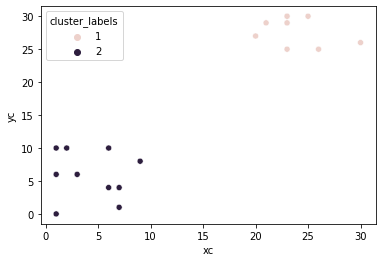

In [ ]:
sns.scatterplot(data = df, x = "xc", y = "yc", hue = "cluster_labels")

**K-means clustering in SciPy**



K-means clustering is a method that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

K-means clustering minimizes within-cluster variances (squared Euclidean distances)

The unsupervised k-means algorithm has a loose relationship to the k-nearest neighbor classifier, a popular supervised machine learning technique for classification that is often confused with k-means due to the name. Applying the 1-nearest neighbor classifier to the cluster centers obtained by k-means classifies new data into the existing clusters.

In [ ]:
from scipy.cluster.vq import kmeans, vq
import random
random.seed((1000,2000))

In [ ]:
dfk = pd.DataFrame({'xc': x, 'yc':y})
dfk['xc'] = dfk['xc'].astype("float")
dfk['yc'] = dfk['yc'].astype("float") # only works with floats for some reason
dfk.sample(5)

,xc,yc
16,23.0,25.0
14,21.0,29.0
12,25.0,30.0
10,23.0,29.0
5,7.0,4.0


In [ ]:
centroids, _ = kmeans(dfk, 2)
dfk['cluster_labels'], _ = vq(dfk, centroids)

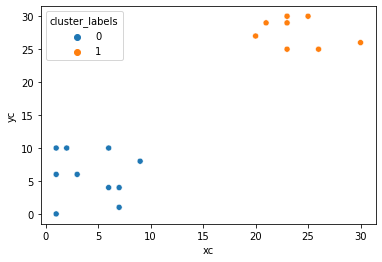

In [ ]:
sns.scatterplot(x="xc", y="yc", hue="cluster_labels", data=dfk)
plt.show()

**Data Preparation for Cluster Analysis**

Why prepare data for clustering?
* Var have incomparable units (product demensions in cm, price in $)
* Var with same units have vastly different scales and variances (expenditures on cereals, travel)
* Data in raw form may lead to bias in clustering
* Clusters may be heavily dependent on one variable
* **Solution**: Normalization of individual variables

> Normalization of data

* Process of rescaling data to a standard deviation of 1
* x_new = x / std_dev(x)

In [ ]:
from scipy.cluster.vq import whiten

In [ ]:
data = [4,3,2,3,1,1,2,0,1,4]
scaled_data = whiten(data)
scaled_data

array([3.07692308, 2.30769231, 1.53846154, 2.30769231, 0.76923077,
       0.76923077, 1.53846154, 0.        , 0.76923077, 3.07692308])

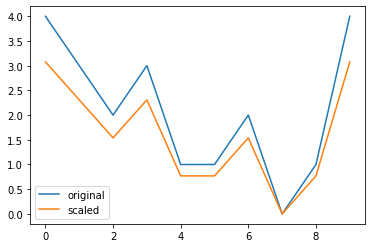

In [ ]:
plt.plot(data, label = "original")
plt.plot(scaled_data, label = "scaled")
plt.legend()
plt.show()

> Normalization of small numbers:

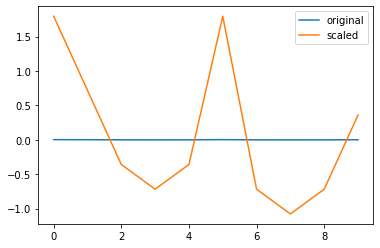

In [ ]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

 Notice how the changes in the original data are negligible as compared to the scaled data

In [ ]:
1+1

2

## Hierarchical Clustering

In [ ]:
!wget https://gist.github.com/seankross/a412dfbd88b3db70b74b/archive/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1.zip

--2021-02-02 22:41:10--  https://gist.github.com/seankross/a412dfbd88b3db70b74b/archive/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1.zip
Resolving gist.github.com (gist.github.com)... 140.82.114.3
Connecting to gist.github.com (gist.github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/gist/a412dfbd88b3db70b74b/zip/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1 [following]
--2021-02-02 22:41:10--  https://codeload.github.com/gist/a412dfbd88b3db70b74b/zip/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [application/zip]
Saving to: ‘5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1.zip.1’

5f23f993cd87c283ce7 100%[===================>]   1.33K  --.-KB/s    in 0s      

2021-02-02 22:41:11 (31.7 MB/s) - ‘5f23f993cd87

In [ ]:
!ls

5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1.zip
5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1.zip.1
a412dfbd88b3db70b74b
a412dfbd88b3db70b74b-5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1
sample_data


In [ ]:
!unzip 5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1.zip

Archive:  5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1.zip
5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1
replace a412dfbd88b3db70b74b-5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: a412dfbd88b3db70b74b-5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv  


In [ ]:
df = pd.read_csv('a412dfbd88b3db70b74b-5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
df.sample(4)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
df.set_index(['model'], inplace= True)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


> Creating a **distance matrix** using linkage()

In [ ]:
dm = linkage(df, method = "single", metric = "euclidean", optimal_ordering= False)
dm

array([[ 0.        ,  1.        ,  0.61532512,  2.        ],
       [11.        , 12.        ,  0.98264948,  2.        ],
       [13.        , 33.        ,  1.37262522,  3.        ],
       [ 9.        , 10.        ,  1.52315462,  2.        ],
       [17.        , 25.        ,  5.14734155,  2.        ],
       [19.        , 36.        ,  7.83247885,  3.        ],
       [20.        , 26.        ,  8.6535903 ,  2.        ],
       [ 6.        , 23.        , 10.07612029,  2.        ],
       [31.        , 38.        , 12.25052754,  3.        ],
       [ 2.        , 40.        , 12.96547435,  4.        ],
       [21.        , 22.        , 14.01549946,  2.        ],
       [18.        , 37.        , 14.34806259,  4.        ],
       [32.        , 35.        , 15.29568648,  4.        ],
       [14.        , 15.        , 15.62244462,  2.        ],
       [28.        , 39.        , 19.35890234,  3.        ],
       [ 8.        , 41.        , 21.09620167,  5.        ],
       [27.        , 47.

multi-step:

In [ ]:
# calculating pairwise distances with pdist function 

from scipy.spatial.distance import pdist, squareform
distances_ms = pdist(df) 
distances_ms[:10]

array([  0.61532512,  54.90860588,  98.11252124, 210.33743961,
        65.47177102, 241.40764901,  50.15327108,  25.46831168,
        15.36419214,  15.67247268])

In [ ]:
import numpy as np
len(distances_ms),  len(distances_ms) == np.cumsum(range(df.shape[0]))[-1] # 196 relationships between 20 variables - checks out

(496, True)

In [ ]:
dm_ms = linkage(distances_ms)
dm_ms

array([[ 0.        ,  1.        ,  0.61532512,  2.        ],
       [11.        , 12.        ,  0.98264948,  2.        ],
       [13.        , 33.        ,  1.37262522,  3.        ],
       [ 9.        , 10.        ,  1.52315462,  2.        ],
       [17.        , 25.        ,  5.14734155,  2.        ],
       [19.        , 36.        ,  7.83247885,  3.        ],
       [20.        , 26.        ,  8.6535903 ,  2.        ],
       [ 6.        , 23.        , 10.07612029,  2.        ],
       [31.        , 38.        , 12.25052754,  3.        ],
       [ 2.        , 40.        , 12.96547435,  4.        ],
       [21.        , 22.        , 14.01549946,  2.        ],
       [18.        , 37.        , 14.34806259,  4.        ],
       [32.        , 35.        , 15.29568648,  4.        ],
       [14.        , 15.        , 15.62244462,  2.        ],
       [28.        , 39.        , 19.35890234,  3.        ],
       [ 8.        , 41.        , 21.09620167,  5.        ],
       [27.        , 47.

* method - how to calculate the proximity of clusters
  * single method - based on two closet objects
  * complete method - based on two farthest objects
  * average method - based on the arithmetic mean of all objects
  * centroid method - based on the geometric mean of all objects
  * median method - based on the median of all objects
  * ward - based on the sum of squares
* metric - function that decides distance 
  * euclidean - straight line distance between points
* optimal_ordering - orders data points

> Create **cluster labels** with fcluster()

In [ ]:
df['cluster_labels'] = fcluster(dm, 5, criterion= "maxclust") # maxclust - 5 max clusters
df.sample(4)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster_labels
model,,,,,,,,,,,,
Fiat 128,32.4,4,78.7,66,4.08,2.20,19.47,1,1,4,1,4
Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1,4
Ford Pantera L,15.8,8,351.0,264,4.22,3.17,14.50,0,1,5,4,1
Merc 450SLC,15.2,8,275.8,180,3.07,3.78,18.00,0,0,3,3,3


* dm - output of linkage() method
* 5 - number of clusers
* criterion - how to decide thresholds to form clusters

**Visualizing clusters**
* Make sense of clusters formed
* Spots trends
* Additional step in validation of clusters

In [ ]:
df = pd.DataFrame({'x' : [2,3,5,6,2],
                   'y' : [1,1,5,5,2],
                   'labels': ['A', 'A', 'B', 'B', 'A']})
colors = {'A': 'red', 'B':'blue'}

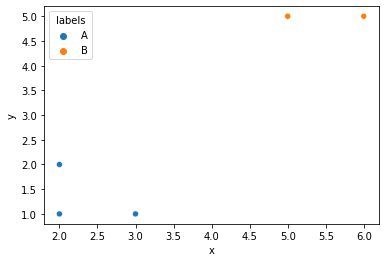

In [ ]:
sns.scatterplot(data = df,x = 'x', y = 'y', hue = 'labels')

**How many Clusters?**

Dendrogram
* Branching diagram that shows progression in a linkage object as we proceed through the hierarchical clustering algorithm
* Helps show progressions as clusters are merged

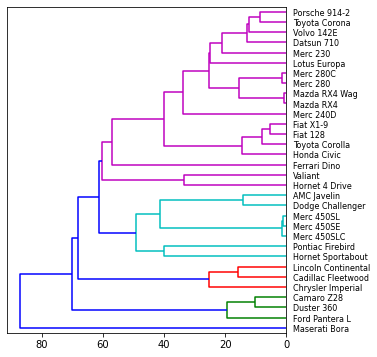

In [ ]:
plt.figure(figsize=(5,6))
dendrogram(dm,
           labels = df.index,
           orientation = "left")
plt.show()

No right metric to decide how many clusters are ideal, decided by the analyst

**Limits of hierarchical clustering**

Computationally infeasable for huge datasets


## K-means clustering

* Runs faster on large data-sets

2 steps:
1. Generate cluster centers
2. Assign cluster labels

> 1 - Generate cluster centers

`kmeans(obs, k_or_guess, iter, thresh, check_finite)`
* obs - standardized objects
* k_or_guess - number of clusters
* iter - number of iterations (default 20)
* thresh - default .00001
* check_finite - whether to check if observations contain only finite numbers (default: True)

Returns two objects: 
* Cluster centers
* Distortion


How is distortion calculated:

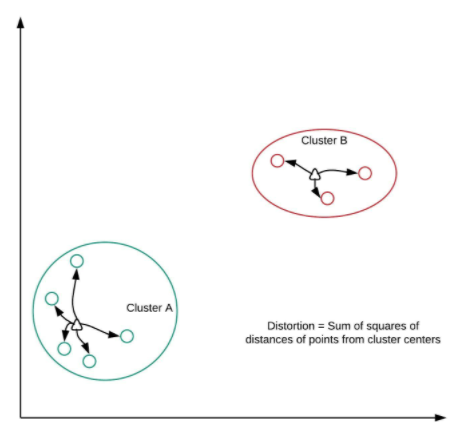

> 2 - Generate cluster labels

`vq(obs, code_book, check_finite = True)`

* obs - standardized observations
* code book - cluster centers
* check_finite - whether to check if observations contained only finite numbers (default: True)

Note on distortions:
* kmeans - returns a single value for distortion
* vq - returns a list of distortions

In [ ]:
!wget https://gist.github.com/seankross/a412dfbd88b3db70b74b/archive/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1.zip

--2021-02-02 22:41:10--  https://gist.github.com/seankross/a412dfbd88b3db70b74b/archive/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1.zip
Resolving gist.github.com (gist.github.com)... 140.82.114.3
Connecting to gist.github.com (gist.github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/gist/a412dfbd88b3db70b74b/zip/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1 [following]
--2021-02-02 22:41:10--  https://codeload.github.com/gist/a412dfbd88b3db70b74b/zip/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [application/zip]
Saving to: ‘5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1.zip.1’

5f23f993cd87c283ce7 100%[===================>]   1.33K  --.-KB/s    in 0s      

2021-02-02 22:41:11 (31.7 MB/s) - ‘5f23f993cd87

In [ ]:
!ls

5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1.zip
5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1.zip.1
a412dfbd88b3db70b74b
a412dfbd88b3db70b74b-5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1
sample_data


In [ ]:
!unzip 5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1.zip

Archive:  5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1.zip
5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1
replace a412dfbd88b3db70b74b-5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: a412dfbd88b3db70b74b-5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv  


In [ ]:
df = pd.read_csv('a412dfbd88b3db70b74b-5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
df.sample(4)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4


In [ ]:
df.set_index(['model'], inplace= True)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
# keep just the continous variables
cars2 = pd.concat((df.loc[:, "mpg"], df.loc[:, "disp":"qsec"]), axis=1)
cars2.head()

,mpg,disp,hp,drat,wt,qsec
model,,,,,,
Mazda RX4,21.0,160.0,110,3.90,2.620,16.46
Mazda RX4 Wag,21.0,160.0,110,3.90,2.875,17.02
Datsun 710,22.8,108.0,93,3.85,2.320,18.61
Hornet 4 Drive,21.4,258.0,110,3.08,3.215,19.44
Hornet Sportabout,18.7,360.0,175,3.15,3.440,17.02


In [ ]:
# scaling variables allows each to have equal importance
# since they are now on the same unit scale
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # instantiate scaler
cars_scaled = sc.fit_transform(cars2)

cars_scaled[:2]

array([[ 0.15329914, -0.57975032, -0.54365487,  0.57659448, -0.62016658,
        -0.78960058],
       [ 0.15329914, -0.57975032, -0.54365487,  0.57659448, -0.35538219,
        -0.47120178]])

In [ ]:
# make it a dataframe

cars_scaled = pd.DataFrame(cars_scaled, columns=cars2.columns, index=cars2.index)
cars_scaled.head(3)

,mpg,disp,hp,drat,wt,qsec
model,,,,,,
Mazda RX4,0.153299,-0.579750,-0.543655,0.576594,-0.620167,-0.789601
Mazda RX4 Wag,0.153299,-0.579750,-0.543655,0.576594,-0.355382,-0.471202
Datsun 710,0.456737,-1.006026,-0.795570,0.481584,-0.931678,0.432823


In [ ]:
# confirm scaled

cars_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,-5.481726e-16,1.016001,-1.633610,-0.786514,-0.150138,0.456737,2.327934
disp,32.0,1.387779e-16,1.016001,-1.308518,-0.900892,-0.282177,0.781053,1.977904
hp,32.0,-1.734723e-17,1.016001,-1.403130,-0.743705,-0.351014,0.493642,2.790515
drat,32.0,-3.122502e-16,1.016001,-1.589643,-0.981576,0.187052,0.614599,2.533809
wt,32.0,4.683753e-17,1.016001,-1.769642,-0.660403,0.111884,0.407820,2.291423
qsec,32.0,-1.469311e-15,1.016001,-1.903996,-0.543694,-0.078889,0.597708,2.871986


In [ ]:
from scipy.cluster.vq import kmeans, vq
cluster_centers, _ = kmeans(cars_scaled, 6)
cluster_centers
# generate cluster centers

array([[ 0.05456155, -0.68608502, -0.38911876,  0.55487781, -0.33758156,
        -0.12599901],
       [-1.39198424,  1.85767225,  1.03698847, -1.03224862,  2.20385414,
        -0.06183191],
       [-0.92558962,  0.8999182 ,  1.86065184,  0.14904759,  0.33253805,
        -1.5699619 ],
       [ 1.68172488, -1.18104497, -1.0548942 ,  1.24483443, -1.39582909,
         0.3124762 ],
       [ 0.26118801, -0.43120963, -0.78371508, -0.31650346, -0.12590238,
         1.51537925],
       [-0.55712985,  0.69603194,  0.34545701, -1.03858264,  0.48940611,
        -0.300631  ]])

In [ ]:
df['cluster'], _ = vq(cars_scaled, cluster_centers)
df.sample(4)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster
model,,,,,,,,,,,,
Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2,5
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1,4
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,3
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,5


In [ ]:
df[df['cluster'] == 5]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster
model,,,,,,,,,,,,
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,5
Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3,5
Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3,5
Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3,5
Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2,5
AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2,5
Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2,5


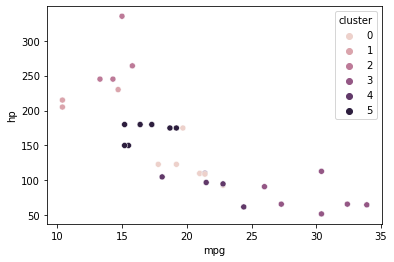

In [ ]:
sns.scatterplot(x = "mpg", y = "hp", data = df, hue = "cluster")

**How many clusters?**

* No absolute method to find right numbers of clusters in k-means 
* There are indicative methods
  * elbow method

Distortion
* sum of squared distances of points from cluster centers
* decreases with an increasing number of clusters
* becomes zero when the number of clusters equals the number of points

Elbow plot: line plot between cluster centers and distortion
* ideal point is one beyond which the distortion decreases relatively less on increasing the number of clusters

In [ ]:
distortions = []
# declaring variables for use
num_clusters = range(2,7)

In [ ]:
# populating distortions for various clusters
for i in num_clusters:
  centroids, distortion = kmeans(cars2, i)
  distortions.append(distortion)

In [ ]:
distortions

[60.46121982101876,
 46.73685149995415,
 39.09371281168652,
 32.316702843707944,
 27.263645037008445]

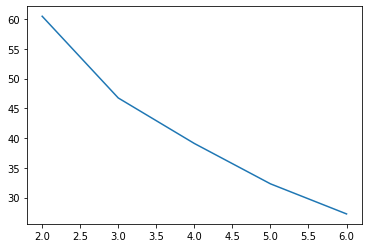

In [ ]:
# plotting elbow plot data
elbow_data = pd.DataFrame({"num_clusters": num_clusters,
                          'distortions': distortions})

sns.lineplot(x = num_clusters, y = distortions, data = elbow_data)
plt.show()
# distortion decreases more gradually after 3

**Limitations of k-means clustering**

* How to find the right number of clusters - K
* Impact of seeds
* Biased towards equal sized clusters

Impact of seeds

In [ ]:
from numpy import random
random.seed(12)

When data is fairly uniform, different seeds can lead to different outcomes

## Visualizing Hierarchies with t-SNE

* t-SNE - t-distributed stochastic neighbor embedding 
  * creates a 2D (or 3D) map of a dataset
  * map approximately preserves nearness of samples (with some distortion)
  



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2021-02-10 13:03:40--  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2021-02-10 13:03:40 (398 MB/s) - ‘iris.data’ saved [4551/4551]



In [ ]:
dfi = pd.read_csv('iris.data', sep = ',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
dfi.columns = attributes
dfi.head()
# iris dataset has 4 measurements, so samples are 4d

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
dfi['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

0      0
1      0
2      0
3      0
4      0
      ..
144    2
145    2
146    2
147    2
148    2
Name: class, Length: 149, dtype: int64

In [ ]:
samples = np.array(dfi.select_dtypes('number'))
species = list(dfi['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}))
samples[:5], species[:5]

(array([[4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4]]), [0, 0, 0, 0, 0])

In [ ]:
samples.shape

(149, 4)

In [ ]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(samples)
transformed[:5]

# tsne only has a fit_transform method - no separate fit/transform
  # can't extend hte map to include new data samples

# learning rate - try values between 50 and 200

array([[ 13.893019 , -17.517336 ],
       [ 12.789981 , -17.04091  ],
       [ 13.0461035, -17.581812 ],
       [ 13.236612 , -14.728776 ],
       [ 14.2586975, -12.903447 ]], dtype=float32)

In [ ]:
transformed.shape

(149, 2)

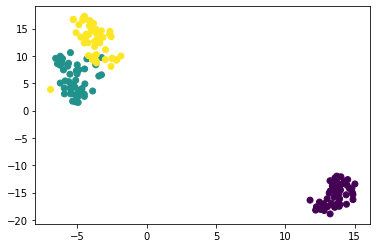

In [ ]:
plt.scatter(transformed[:,0], transformed[:,1], c = species)
plt.show()
# axes of t-SNE plot don't have any interpretable meaning
# t-SNE features are different every time

# Dimension Reduction

Dimension reduction:
* Finds patterns in data, and uses these patterns to re-express it in a compressed form
* Makes subsequent computations with the data much more fast and efficient
* Removes less-informative "noise" features

Principal Component Analysis (PCA)
* Fundamental dimension reduction technique
* 2 steps:
  1. decorrelation
  2. dimension reduction

PCA aligns data with axes
* Rotates data samples to be aligned with axes
* Shifts data samples so they have mean 0
* No information is lost

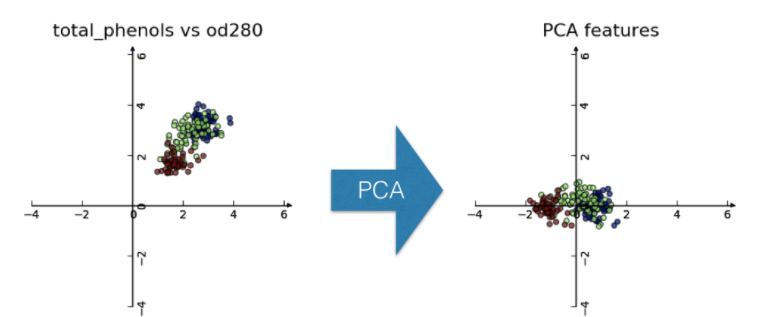

`PCA` is a scikit-learn component like Kmeans or StandarsDcaler
* `fit()` - learns the transformation from given data
* `transform()` - applies the learned transformation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/2b27d4c4bdd65801a3b5c09442be3cb0beb9eae0/wine.csv')
df.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.shape

(178, 15)

In [ ]:
samples = df[['total_phenols', 'od280']]
samples

,total_phenols,od280
0,2.80,3.92
1,2.65,3.40
2,2.80,3.17
3,3.85,3.45
4,2.80,2.93
...,...,...
173,1.68,1.74
174,1.80,1.56
175,1.59,1.56
176,1.65,1.62


In [ ]:
model = PCA()
model.fit(samples)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
transformed = model.transform(samples)
transformed[:5]
# columns of new array correspond to PCA features

array([[-1.32771994,  0.45139607],
       [-0.83249607,  0.23309966],
       [-0.75216868, -0.02947892],
       [-1.64026613, -0.65572401],
       [-0.56799228, -0.18335891]])

> One step with fit_transform()

In [ ]:
transformed2 = model.fit_transform(samples)
transformed2[:5]
# can be accomplisthed in one step with fit_transform 

array([[-1.32771994,  0.45139607],
       [-0.83249607,  0.23309966],
       [-0.75216868, -0.02947892],
       [-1.64026613, -0.65572401],
       [-0.56799228, -0.18335891]])

In [ ]:
transformed.shape
# one row for each transformed sample

(178, 2)

PCA features are **not correlated**
* Features of a datset are often correlated, e.g. `total_phenols` and `od280`
* PCA, due to the roatation it performs to align data with axes, "de-correlates" the data in the sense that the columns in the transformed array are not linearly corellated

Pearson correlation
* value between -1 and 1 that measures linear corellation of features
* Value of 0 means no linear correlation

In [ ]:
np.corrcoef(samples.iloc[:,0], samples.iloc[:,1])[0,1]
# correlation between original arrays

0.6999493647911861

In [ ]:
np.corrcoef(transformed[:,0], transformed[:,1])[0,1]
# correlation of transformed features
# basically 0 

2.637401882347688e-16

**Principal Components**

* Directions of variance
* PCA aligns these principal components with the axes

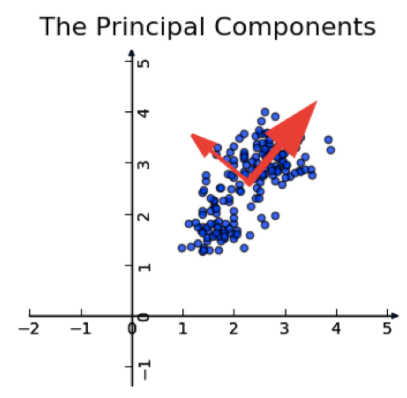


* Available as `components_` attribute of PCA object
* Each row defines displacement from mean

In [ ]:
model.components_

array([[-0.64116665, -0.76740167],
       [-0.76740167,  0.64116665]])

**Intrinsic Dimension**

> Example of a flight path:

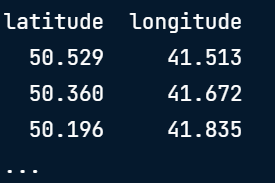

* 2 features, latitude and longitude at points along a flight path
* Dataset *appears* to be 2-d

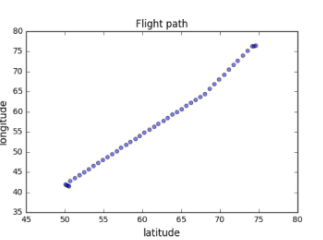

* Can be approximated using one features: displacement among flight path
* Intrinsically 1-dimensional

Intrinsic dimension
* = the number of features needed to approximate the dataset
* Essential idea behind dimension reduction
  * Tells us how much a dataset can be compressed
* Can be detected with PCA
  * PCA identified intrinsic dimension when samples have any number of features
  * ID = # of PCA features with significant variance

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2021-02-07 16:59:14--  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2021-02-07 16:59:14 (278 MB/s) - ‘iris.data’ saved [4551/4551]



In [ ]:
dfi = pd.read_csv('iris.data', sep = ',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
dfi.columns = attributes
dfi.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Versicolor Dataset:
* "versicolor", one of three iris species
* only 3 features: sepal_lenght, sepal_width, and pedal_width
* Samples are points in 3D space

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [ ]:
dfv = dfi[dfi['class'] == "Iris-versicolor"]
dfv.drop(['petal_length', 'class'], axis = 1, inplace= True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


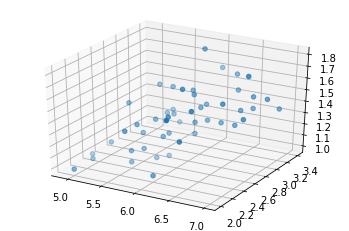

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfv['sepal_length'], dfv['sepal_width'], dfv['petal_width'])
# intrinsic 2 samples 

^ Samples don't vary much in vertical direction, likely only 2 intrinsic dimensions

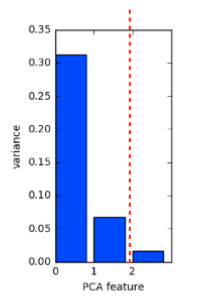

In [ ]:
pca = PCA()
pca.fit(dfv)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
features = range(pca.n_components_)
features

range(0, 3)

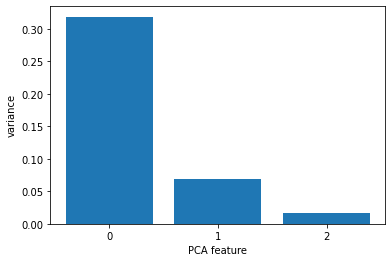

In [ ]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [ ]:
mean = pca.mean_
mean

array([5.936, 2.77 , 1.326])

In [ ]:
first_pc = model.components_[0,:]
first_pc

array([-0.64116665, -0.76740167])

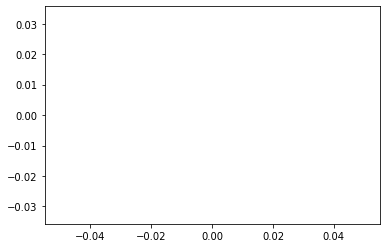

In [ ]:
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.axis('equal')
plt.show()

Intrinsic diemension can be ambiguous
* Not always one correct answer

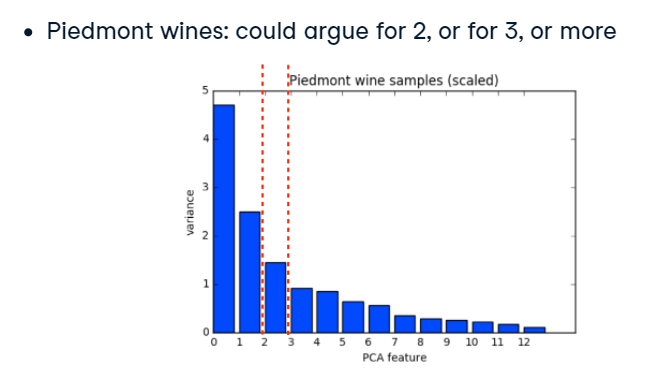

**Dimension reduction with PCA**

* PCA features are in decreasing order of variance:
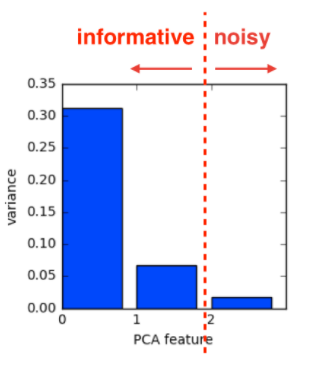

* Assumes low variance features are "noise"
  * .... and high variance features are informative

* Specify how many features to keep eg - `PCA(n_components = 2)`
  * Intrinsic dimension is a good choice

In [ ]:
dfi = pd.read_csv('iris.data', sep = ',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
dfi.columns = attributes
species = dfi['class']
dfi.drop( 'class', axis = 1, inplace= True)
dfi.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [ ]:
pca = PCA(n_components= 2)
pca.fit(dfi)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
transformedi = pca.transform(dfi)
transformedi.shape

(149, 2)

In [ ]:
transformedi[:5]

array([[-2.73363445, -0.16331092],
       [-2.90803676, -0.13076902],
       [-2.76491784, -0.30475856],
       [-2.7461081 ,  0.34027983],
       [-2.29679724,  0.75348469]])

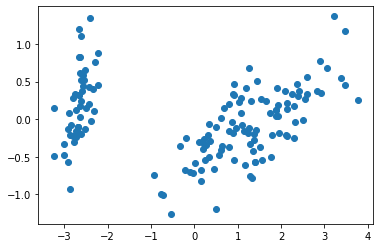

In [ ]:
xs = transformedi[:,0]
ys = transformedi[:,1]
plt.scatter(xs, ys)
plt.show()

* PCA discards low variance features
* Assumes high variance features are informative
  * assumption usually holds in practice

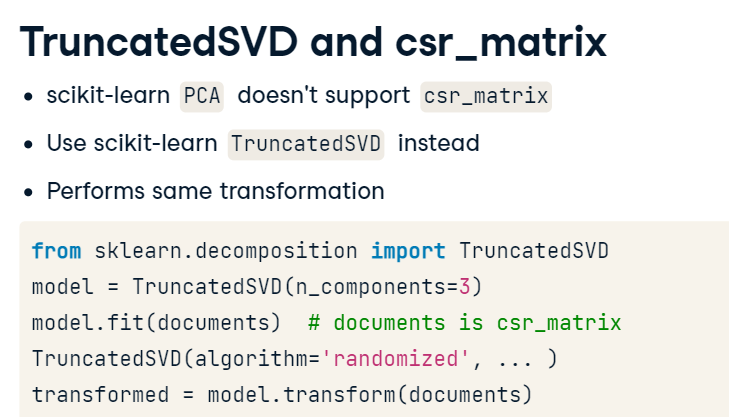